In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

LIBRARY_ROOT_PATH = os.path.abspath(os.path.join(".."))
sys.path.append(LIBRARY_ROOT_PATH)

In [3]:
import torch
import cv2
from torchvision.io.image import read_image

In [4]:
from detector_kit.detector import ObjectDetector, pre_process_object_detector_input

In [5]:
device = torch.device("cuda:0")

object_detector = ObjectDetector.init_retina_net(device=device)

In [6]:
from glob import glob

ASSETS_PATH = os.path.join(LIBRARY_ROOT_PATH, "assets")
IMAGES_DIR_PATH = os.path.join(ASSETS_PATH, "images")
IMAGES_PATHS = glob(os.path.join(IMAGES_DIR_PATH, "*.jpg"))

In [14]:
img = cv2.imread(IMAGES_PATHS[1])

In [15]:
predictions = object_detector.detect_objects(image=img, confidence_threshold=0.4)

In [16]:
predictions

[BoundingBox(label='person', confidence=0.9911413192749023, left_top=Point(x=283, y=272), right_bottom=Point(x=979, y=847)),
 BoundingBox(label='car', confidence=0.7846070528030396, left_top=Point(x=1, y=421), right_bottom=Point(x=131, y=806)),
 BoundingBox(label='car', confidence=0.5906019806861877, left_top=Point(x=145, y=433), right_bottom=Point(x=350, y=612))]

In [17]:
from detector_kit.visualisation import draw_bounding_boxes 

In [21]:
image_with_predictions = draw_bounding_boxes(image=img[:, :, ::-1], bounding_boxes=predictions)

In [22]:
import matplotlib.pyplot as plt

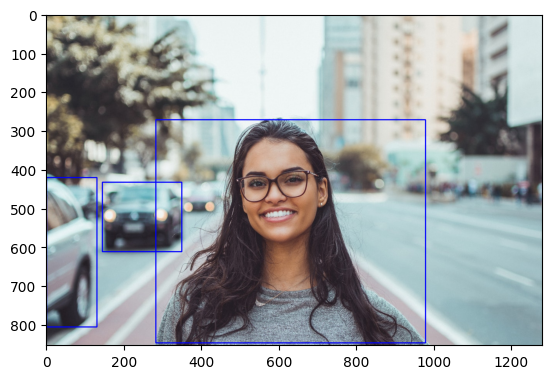

In [23]:
plt.imshow(image_with_predictions)